In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [124]:
df.shape

(10000, 12)

In [125]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [126]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [127]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [128]:
num_cols = df._get_numeric_data().columns
num_cols

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [129]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [130]:
cat_cols = ['country', 'gender']
X_new = pd.get_dummies(X, columns = cat_cols)
X_new.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [131]:
from sklearn.preprocessing import minmax_scale
    
for i in X_new.columns:
    X_new[i] = minmax_scale(X_new[i])
    
X_new.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,0.275616,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,1.0,0.0
1,0.326454,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,1.0,0.0
2,0.214421,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,1.0,0.0
3,0.542636,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,1.0,0.0
4,0.688778,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,1.0,0.0


In [132]:
X_new.shape

(10000, 14)

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [134]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def to_print(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print ("Accuracy:", accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 score:', f1)

Accuracy: 0.867
Precision: 0.7509025270758123
Recall: 0.5135802469135803
F1 score: 0.6099706744868035
Decision Function: [-1.02632689 -1.31401154 -1.43475909 ... -2.91493932 -1.79281687
 -1.73430819]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


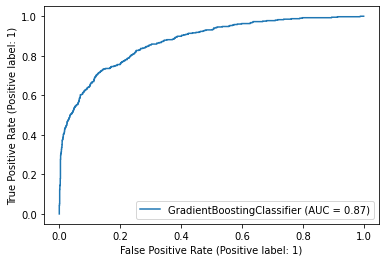

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
to_print(y_test,y_pred)

df = clf.decision_function(X_test)
print("Decision Function:", df)
plot_roc_curve(clf, X_test, y_test)

--------------- For learning rate = 0.05 ---------------
Accuracy: 0.8695
Precision: 0.7857142857142857
Recall: 0.4888888888888889
F1 score: 0.6027397260273972
Decision Function: [-1.23156368 -1.21579878 -1.12859513 ... -2.77311439 -1.84660123
 -1.52380656]
--------------- For learning rate = 0.1 ---------------


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.8665
Precision: 0.75
Recall: 0.5111111111111111
F1 score: 0.6079295154185022
Decision Function: [-1.02632689 -1.31401154 -1.43475909 ... -2.91493932 -1.79281687
 -1.73430819]
--------------- For learning rate = 0.25 ---------------


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.8615
Precision: 0.7162162162162162
Recall: 0.5234567901234568
F1 score: 0.6048502139800286
Decision Function: [-1.22896716 -0.96024609 -2.04952398 ... -2.27584098 -1.59866183
 -1.79015248]
--------------- For learning rate = 0.5 ---------------


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.8505
Precision: 0.6666666666666666
Recall: 0.5234567901234568
F1 score: 0.5864453665283542
Decision Function: [-1.73968692 -0.51664672 -2.36870478 ... -0.93592993 -1.63294839
 -2.31130987]
--------------- For learning rate = 0.75 ---------------


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.842
Precision: 0.6320474777448071
Recall: 0.5259259259259259
F1 score: 0.5741239892183289
Decision Function: [-2.04997286 -0.86468362 -2.19690312 ... -2.2114503  -2.12238598
 -2.57815823]
--------------- For learning rate = 1 ---------------


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.83
Precision: 0.5947521865889213
Recall: 0.5037037037037037
F1 score: 0.5454545454545454
Decision Function: [-0.06333692 -1.73836681 -2.36474123 ... -2.69169435 -0.54656907
 -2.1677456 ]


c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


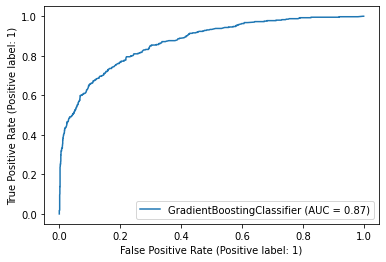

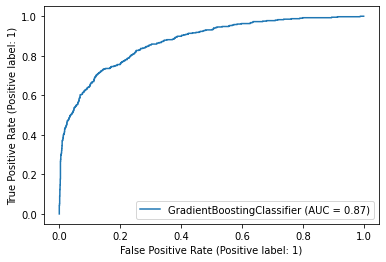

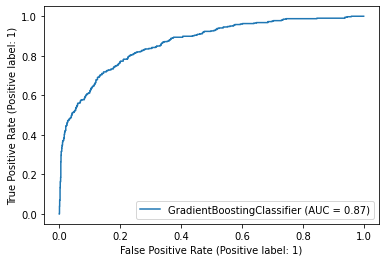

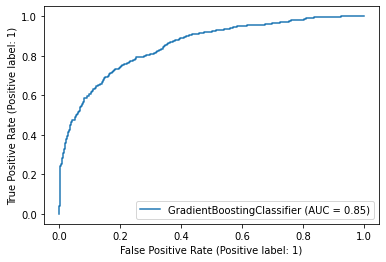

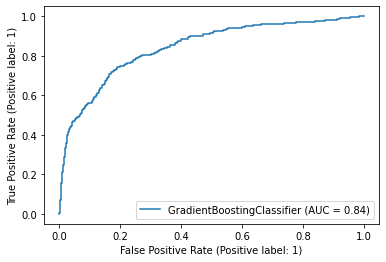

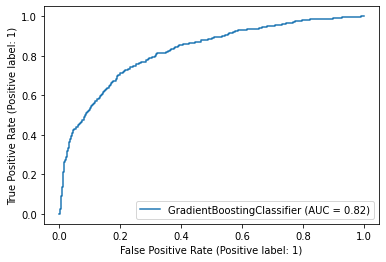

In [141]:
learning_rate = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

for lr in learning_rate:
    print("---------------", "For learning rate =", lr, "---------------")
    clf = GradientBoostingClassifier(learning_rate = lr)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    to_print(y_test,y_pred)

    df = clf.decision_function(X_test)
    print("Decision Function:", df)
    plot_roc_curve(clf, X_test, y_test)